In [132]:
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geopy.geocoders import Nominatim

## Geotagging the scraped Data

In [133]:
df = pd.read_csv('all_reviews.csv')
locations_df = pd.read_csv('locations_geotagged.csv')
beer_df = pd.read_csv('beer_deets.csv')

In [134]:
df

beer_name  beer_rating  \
0                    St. Peter's Ruby Red Ale          3.3   
1            Shepherd Neame Spitfire (Bottle)          2.2   
2                             Arbor Rocketman          3.8   
3      Shepherd Neame India Pale Ale (Bottle)          3.4   
4                Shepherd Neame Christmas Ale          3.3   
...                                       ...          ...   
21749          Firestone Walker Napa Parabola          2.3   
21750                  Carling Original Lager          3.8   
21751              Brothers Rhubarb & Custard          1.0   
21752      Riedenburger Alkoholfrei Naturtrüb          3.8   
21753      Anchorage Patterns 4 Quadruple IPA          1.9   

               brewery_location                               brewery_name  \
0               Bungay, Suffolk                        St. Peter's Brewery   
1               Faversham, Kent                             Shepherd Neame   
2      Bristol, Gloucestershire                                 Arbor Ales   
3               Faversham, Kent                             Shepherd Neame   
4               Faversham, Kent                             Shepherd Neame   
...                         ...                                        ...   
21749                      -1.7  Firestone Walker Brewing (Duvel-Moortgat)   
21750                      +2.1             Molson Coors UK (Molson Coors)   
21751                      -1.6           Brothers Cider (Brothers Drinks)   
21752                      +1.5                      Riedenburger Brauhaus   
21753                      -1.6                  Anchorage Brewing Company   

                                          review_content        reviewer_name  
0      Ruby color, offwhite coam. Aroma and taste: fl...            alex_leit  
1      Disappointing show from the lads at ‘Britain’s...  shivermetimber.gray  
2      Puszka. Mętne o żółtym kolorze. Piana biała,ob...              MarcinG  
3      Bottle. Amber with bronze color and white foam...            alex_leit  
4      Bottle. Aroma: English hops and malts with tof...            alex_leit  
...                                                  ...                  ...  
21749  Bottle (2019 vintage). Head is initially small...               Ernest  
21750  Lovely light taste best served ice cold. An ex...             ashharro  
21751  I bought it at jumbo (0,5) for 3 euro. I think...         FoamRespek57  
21752  Having one at Brideler Stuff in Bridel/Luxembo...               ophone  
21753  Packaged on 18 September 19. The Aromas are ho...            drpimento  

[21754 rows x 6 columns]

In [135]:
locations_df

locations   latitude   longitude  \
0                      Bungay, Suffolk  52.456225    1.437341   
1                      Faversham, Kent  51.314409    0.891189   
2             Bristol, Gloucestershire  51.852767   -2.255369   
3                    Round Rock, Texas  30.508235  -97.678893   
4                   Brooklyn, New York  40.650104  -73.949582   
...                                ...        ...         ...   
2049  North Charleston, South Carolina  32.913129  -80.062998   
2050                 St Helens, Oregon  45.864003 -122.806492   
2051         Höchstadt-Greuth, Bavaria  49.760854   10.894785   
2052               Hohenthann, Bavaria  48.661140   12.091857   
2053            Rugeley, Staffordshire  52.758940   -1.936204   

                       country  
0               United Kingdom  
1               United Kingdom  
2               United Kingdom  
3     United States of America  
4     United States of America  
...                        ...  
2049  United States of America  
2050  United States of America  
2051                   Germany  
2052                   Germany  
2053            United Kingdom  

[2054 rows x 4 columns]

In [136]:
geolocator = Nominatim(user_agent="None")

In [137]:
locations_new = pd.DataFrame(df.brewery_location[~df.brewery_location.isin(locations_df.locations)].unique(),columns=['locations'])
print(len(locations_new), "new locations to search for! Will take", len(locations_new)/2, "seconds to run.")

43 new locations to search for! Will take 21.5 seconds to run.


In [138]:
def tryconvert(x):
        try:
            return geolocator.geocode(x).latitude
        except:
            return None
    

In [139]:
def tryconvertlong(x):
        try:
            return geolocator.geocode(x).longitude
        except:
            return None

In [140]:
locations_new["latitude"] = locations_new.locations.apply(lambda x: tryconvert(x))

In [141]:
locations_new["longitude"] = locations_new.locations.apply(lambda x: tryconvertlong(x))

In [142]:
countries = []
for row in locations_new.index:
    try:
        loc = geolocator.reverse([locations_new.iloc[row,1],locations_new.iloc[row,2]], language='en')
        countries.append(loc.raw['address']['country'])
    except:
        countries.append(None)
        
    

In [143]:
locations_new['country'] = countries

In [144]:
locations_new

locations   latitude   longitude  \
0                      Wildwood, New Jersey  38.991780  -74.814889   
1                   Elizabethtown, Kentucky  37.693952  -85.859128   
2                             Ings, Cumbria  54.381035   -2.853964   
3                       Milton, Oxfordshire  52.011452   -1.345774   
4                             Eibau, Saxony  50.991788   14.651944   
5                     Trowbridge, Wiltshire  51.319510   -2.201786   
6            Voerde, North Rhine-Westphalia  51.597513    6.681178   
7                       Cold Ash, Berkshire  51.424984   -1.262323   
8                            Blue Ash, Ohio  39.232007  -84.378282   
9               Tübingen, Baden-Württemberg  48.523616    9.053553   
10                      Burnley, Lancashire  53.790726   -2.243920   
11                Snainton, North Yorkshire  54.226374   -0.587596   
12  Weilheim an der Teck, Baden-Württemberg  48.617399    9.538189   
13                        Teisnach, Bavaria  49.036456   12.997334   
14                 Long Valley , New Jersey  40.781647  -74.759239   
15                         Vienna, Virginia  38.901373  -77.265176   
16                 Traverse City , Michigan  44.760644  -85.616530   
17          Pirmasens, Rhineland-Palatinate  49.199696    7.608785   
18                       Tustin, California  33.745851 -117.826166   
19                         Stayner, Ontario  44.419464  -80.090445   
20          Saint-Alexis-des-Monts , Quebec  46.462694  -73.143196   
21                  Pembroke, New Hampshire  43.147090  -71.457825   
22                   Kilham, East Yorkshire  54.077465   -0.393758   
23                        Bel Air, Maryland  39.535506  -76.349040   
24               West Hollywood, California  34.092301 -118.369289   
25                      Chatham, New Jersey  40.740924  -74.383671   
26                          Dresden, Saxony  51.049329   13.738144   
27                        Havant, Hampshire  50.833420   -0.982659   
28                  Bewdley, Worcestershire  52.375476   -2.316241   
29             Neunkirchen am Sand, Bavaria  49.522414   11.322252   
30                        Pewsey, Wiltshire  51.342084   -1.765856   
31          Staufenberg - Daubringen, Hesse  50.658389    8.737082   
32                  Reinstorf, Lower Saxony  53.234468   10.571137   
33                        Scotland, Ontario  43.027490  -80.372543   
34                           Irsee, Bavaria  47.908276   10.572057   
35                Mount Pearl, Newfoundland  47.518938  -52.814444   
36                   Ebermannstadt, Bavaria  49.780211   11.187511   
37                  Lauf, Baden-Württemberg  48.648583    8.129220   
38             Nürtingen, Baden-Württemberg  48.626585    9.336546   
39                             Oslo, Norway  59.913330   10.738970   
40                Nagold, Baden-Württemberg  48.551240    8.723494   
41            Hagen, North Rhine-Westphalia  51.358294    7.473296   
42                        Leinburg, Bavaria  49.450851   11.308511   

                     country  
0   United States of America  
1   United States of America  
2             United Kingdom  
3             United Kingdom  
4                    Germany  
5             United Kingdom  
6                    Germany  
7             United Kingdom  
8   United States of America  
9                    Germany  
10            United Kingdom  
11            United Kingdom  
12                   Germany  
13                   Germany  
14  United States of America  
15  United States of America  
16  United States of America  
17                   Germany  
18  United States of America  
19                    Canada  
20                    Canada  
21  United States of America  
22            United Kingdom  
23  United States of America  
24  United States of America  
25  United States of America  
26                   Germany  
27            United Kingdom  
28            United Kingdom  
29                   Ge

In [145]:
locations_df = pd.concat([locations_df,locations_new])
locations_df.to_csv('locations_geotagged.csv',index=False)

## Deal with Non-English Descriptions

## Merging and cleaning

In [146]:
beer_df

return_string flag  \
0      St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...   🇬🇧   
1      Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...   🇬🇧   
2      Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...   🇬🇧   
3      Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...   🇬🇧   
4      Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...   🇬🇧   
...                                                  ...  ...   
11978  Turtleback Ridge Kölsch\n🇺🇸 Kölsch / Kolsch-St...   🇺🇸   
11979  Tired Hands Frequency Illusion; Edelzwicker\n🇺...   🇺🇸   
11980  Turtleback Ridge Honey Saison\n🇺🇸 Saison / Far...   🇺🇸   
11981  Plagwitzer Ale\n🇩🇪 Blonde Ale / Golden Ale\n-\...   🇩🇪   
11982  Bar Hop Old Souls VIII\n🇨🇦 Sour / Wild Beer\n-...   🇨🇦   

                                 type  abv rb_overall_score rb_style_score  \
0           Bitter - Ordinary / Best   4.3               49             95   
1           Bitter - Ordinary / Best   4.5               34             59   
2                                IPA   6.0               95             97   
3                      IPA - English   6.1               46             47   
4               Strong Ale - English   7.0               45             46   
...                               ...  ...              ...            ...   
11978           Kölsch / Kolsch-Style  NaN                -              -   
11979   Saison / Farmhouse - Flavored  NaN                -              -   
11980   Saison / Farmhouse - Flavored  NaN                -              -   
11981         Blonde Ale / Golden Ale  NaN                -              -   
11982                Sour / Wild Beer  NaN                -              -   

      rb_user_rating  rb_rating_number  \
0               3.25             415.0   
1               3.05            1083.0   
2               3.74              59.0   
3               3.22             420.0   
4               3.18             409.0   
...              ...               ...   
11978           3.60               1.0   
11979           4.00               1.0   
11980           3.70               1.0   
11981           3.30               1.0   
11982           3.60               3.0   

                                        name_found  
0                         St. Peter's Ruby Red Ale  
1                 Shepherd Neame Spitfire (Bottle)  
2                                  Arbor Rocketman  
3           Shepherd Neame India Pale Ale (Bottle)  
4                     Shepherd Neame Christmas Ale  
...                                            ...  
11978                      Turtleback Ridge Kölsch  
11979  Tired Hands Frequency Illusion; Edelzwicker  
11980                Turtleback Ridge Honey Saison  
11981                               Plagwitzer Ale  
11982                       Bar Hop Old Souls VIII  

[11983 rows x 9 columns]

In [147]:
# Creating DF with all details
df_all = pd.merge(df,locations_df,how='left',left_on='brewery_location',right_on='locations')
df_all = pd.merge(df_all, beer_df, how='left', left_on='beer_name',right_on='name_found')
df_all


beer_name  beer_rating  \
0                    St. Peter's Ruby Red Ale          3.3   
1            Shepherd Neame Spitfire (Bottle)          2.2   
2                             Arbor Rocketman          3.8   
3      Shepherd Neame India Pale Ale (Bottle)          3.4   
4                Shepherd Neame Christmas Ale          3.3   
...                                       ...          ...   
21960          Firestone Walker Napa Parabola          2.3   
21961                  Carling Original Lager          3.8   
21962              Brothers Rhubarb & Custard          1.0   
21963      Riedenburger Alkoholfrei Naturtrüb          3.8   
21964      Anchorage Patterns 4 Quadruple IPA          1.9   

               brewery_location                               brewery_name  \
0               Bungay, Suffolk                        St. Peter's Brewery   
1               Faversham, Kent                             Shepherd Neame   
2      Bristol, Gloucestershire                                 Arbor Ales   
3               Faversham, Kent                             Shepherd Neame   
4               Faversham, Kent                             Shepherd Neame   
...                         ...                                        ...   
21960                      -1.7  Firestone Walker Brewing (Duvel-Moortgat)   
21961                      +2.1             Molson Coors UK (Molson Coors)   
21962                      -1.6           Brothers Cider (Brothers Drinks)   
21963                      +1.5                      Riedenburger Brauhaus   
21964                      -1.6                  Anchorage Brewing Company   

                                          review_content        reviewer_name  \
0      Ruby color, offwhite coam. Aroma and taste: fl...            alex_leit   
1      Disappointing show from the lads at ‘Britain’s...  shivermetimber.gray   
2      Puszka. Mętne o żółtym kolorze. Piana biała,ob...              MarcinG   
3      Bottle. Amber with bronze color and white foam...            alex_leit   
4      Bottle. Aroma: English hops and malts with tof...            alex_leit   
...                                                  ...                  ...   
21960  Bottle (2019 vintage). Head is initially small...               Ernest   
21961  Lovely light taste best served ice cold. An ex...             ashharro   
21962  I bought it at jumbo (0,5) for 3 euro. I think...         FoamRespek57   
21963  Having one at Brideler Stuff in Bridel/Luxembo...               ophone   
21964  Packaged on 18 September 19. The Aromas are ho...            drpimento   

                      locations   latitude   longitude         country  \
0               Bungay, Suffolk  52.456225    1.437341  United Kingdom   
1               Faversham, Kent  51.314409    0.891189  United Kingdom   
2      Bristol, Gloucestershire  51.852767   -2.255369  United Kingdom   
3               Faversham, Kent  51.314409    0.891189  United Kingdom   
4               Faversham, Kent  51.314409    0.891189  United Kingdom   
...                         ...        ...         ...             ...   
21960                      -1.7  48.780313   10.039726         Germany   
21961                      +2.1  33.814488  130.890462           Japan   
21962                      -1.6  48.718182    9.989251         Germany   
21963                      +1.5  52.583680   13.276598         Germany   
21964                      -1.6  48.718182    9.989251         Germany   

                                           return_string flag  \
0      St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...   🇬🇧   
1      Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...   🇬🇧   
2      Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...   🇬🇧   
3      Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...   🇬🇧   
4      Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...   🇬🇧   
...                                                  ...  ...   
21960  Firestone Walker Napa Parabola

In [148]:
df_all.drop(["locations","return_string","name_found"],axis=1,inplace=True)

In [149]:
# df_all[len(df_all['brewery_location'].str)<4]

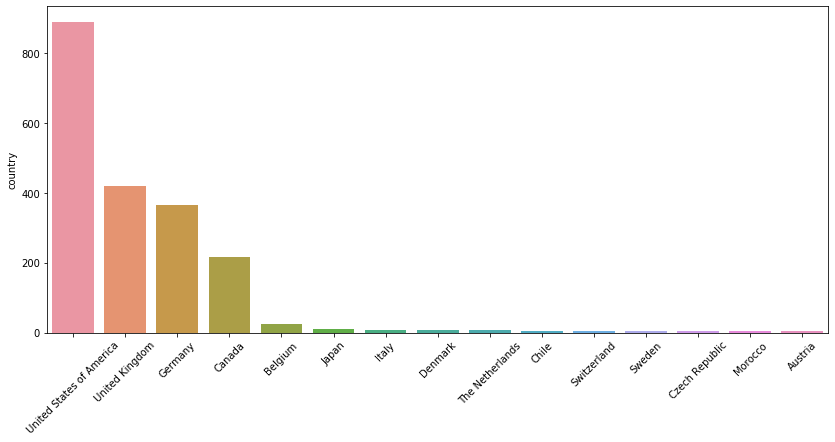

In [150]:
# Where the beers are from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=locations_df.country.value_counts().head(15).index,y=locations_df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

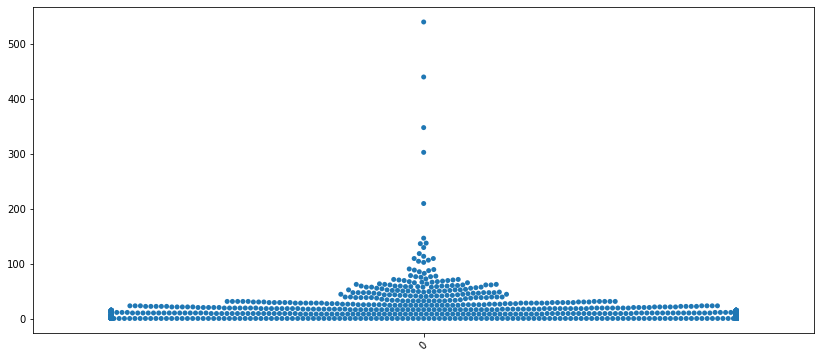

In [151]:
plt.figure(figsize=(14,6))
ax = sns.swarmplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [152]:
df.groupby("reviewer_name").review_content.count()

reviewer_name
101poodles       7
151rum           1
17Beer          25
2OLD4BS         23
2mutchbeer41     2
                ..
zizzybalubba     5
zombywoof        1
zoucrew102      60
zvikar          11
zvsn            28
Name: review_content, Length: 2360, dtype: int64

In [153]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=)
plt.show()

SyntaxError: invalid syntax (<ipython-input-153-139d7ca9f737>, line 2)